收藏色彩
scale_fill_manual(values = c("LC"="#98d09d","NT"="#d7e698",
                               "DD"="#dadada","VU"="#fbf398",
                               "EN"="#f7a895","CR"="#e77381",
                               "EW"="#9b8191","EX"="#8f888b"),

In [116]:
#setwd("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/")
setwd("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/gRNA30all/")

In [121]:
wid=8 #设置输出图片宽
high=8 #设置输出图片长
mismatch=0 #修改此处
inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/gRNA30all/Output",mismatch,".txt",sep="") #修改此处
metadata<-read.table("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/TE.total.num.txt") #修改此处
data<-read.table(inputfile)
#inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/gRNA30all/Output",mismatch,".txt",sep="")

`summarise()` has grouped output by 'subfamily'. You can override using the
`.groups` argument.


[1] 69  6

png 
  2

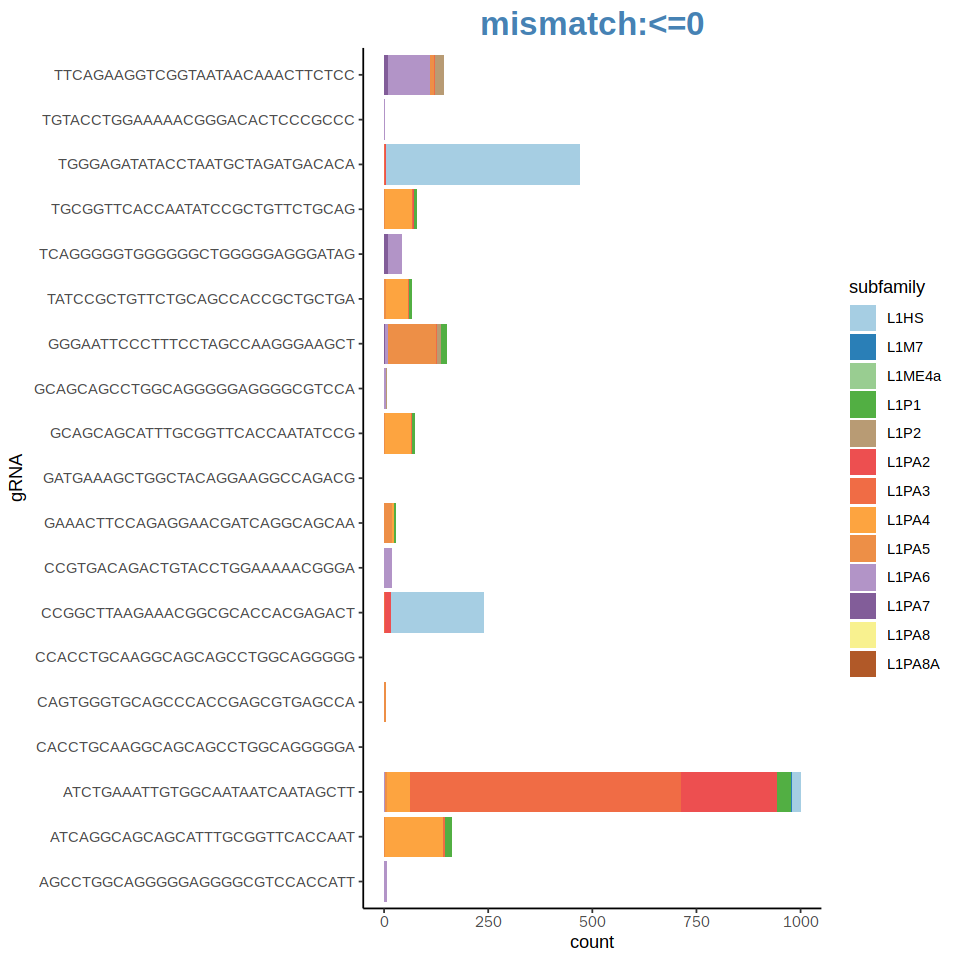

png 
  2

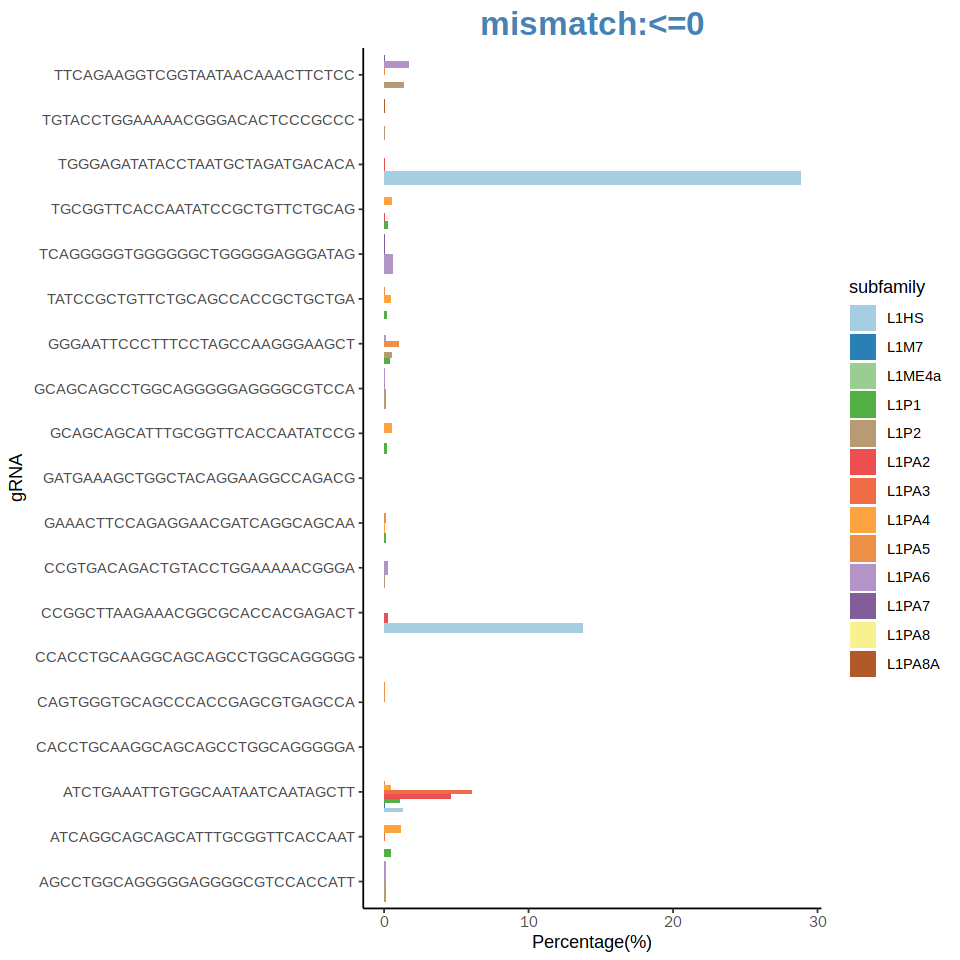

In [122]:
#head(data)
library(dplyr)
library(tidyr)
data_ext<-data %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
#head(data_ext)
colnames(data_ext)[4]<-"count"
colnames(data_ext)[5]<-"gRNA"
addition_gRNANT<-as.data.frame(matrix(c("L1","L1HS",">6k",0,"GATGAAAGCTGGCTACAGGAAGGCCAGACG"),nrow=1))
colnames(addition_gRNANT)<-c("family","subfamily","length","count","gRNA")
data_ext<-rbind(data_ext,addition_gRNANT)
data_ext$count<-as.numeric(data_ext$count)
plotDat <- data_ext %>% group_by(subfamily,gRNA) %>% summarize(sum(count))
metadata2<-subset(metadata,metadata$V2=="sum")
metadata3<-metadata2 %>% separate(V1, c("family","subfamily"),sep = "[:]")
plotDat2<-merge(plotDat,metadata3,by="subfamily")
dim(plotDat2)
colnames(plotDat2)[3]<-"count"
colnames(plotDat2)[6]<-"total"
plotDat2$count<-as.numeric(plotDat2$count)
plotDat2$total<-as.numeric(plotDat2$total)
plotDat2$per<-(plotDat2$count/plotDat2$total)*100
#head(plotDat2,20)
library(ggplot2)
library(RColorBrewer)
options(repr.plot.width =wid, repr.plot.height =high)
title<-paste("mismatch:<=",mismatch,sep="")
colorNum<- length(unique(plotDat2$subfamily))
p2<-ggplot(plotDat2, aes(y=count, x=gRNA,fill=subfamily)) + 
  geom_bar(position='stack', stat='identity')+
  #scale_fill_brewer(palette = "Paired")+
  scale_fill_manual(values = colorRampPalette(brewer.pal(12,"Paired"))(colorNum))+
 # scale_fill_manual(values = c("#98d09d","#dadada","#f7a895","#9b8191"))+
  labs(title=title)+
  #facet_grid(. ~ gRNA) +
  coord_flip()+
  theme_classic()+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
p2
outputfile<-paste("sgRNA-count",mismatch,".pdf",sep="")
pdf(outputfile,width = wid,height = high) #调整大小
p2
dev.off()

p3<-ggplot(plotDat2, aes(y=per, x=gRNA,fill=subfamily)) + 
  geom_bar(position='dodge', stat='identity')+
  #scale_fill_brewer(palette = "Paired")+
  scale_fill_manual(values = colorRampPalette(brewer.pal(12,"Paired"))(colorNum))+
 # scale_fill_manual(values = c("#98d09d","#dadada","#f7a895","#9b8191"))+
 # labs(title=title)+
  #facet_grid(. ~ gRNA) +
  coord_flip()+
  theme_classic()+
  labs(title=title,y="Percentage(%)")+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
p3
outputfile<-paste("sgRNA-percentage",mismatch,".pdf",sep="")
pdf(outputfile,width = wid,height = high)
p3
dev.off()

In [113]:
# metadata<-read.table("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/TE.total.num.txt")
# mergeDat<-merge(data,metadata,by="V1")
# library(dplyr)
# library(tidyr)
# data_ext<-mergeDat %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
# colnames(data_ext)[4]<-"count"
# colnames(data_ext)[5]<-"gRNA"
# colnames(data_ext)[6]<-"label"
# colnames(data_ext)[7]<-"total"
# #head(data_ext)
# addition_gRNANT<-as.data.frame(matrix(c("L1","L1HS",">6k",0,"GATGAAAGCTGGCTACAGGAAGGCCAGACG",">6k",1),nrow=1))
# #addition_gRNANT
# colnames(addition_gRNANT)<-c("family","subfamily","length","count","gRNA","label","total")
# data_ext<-rbind(data_ext,addition_gRNANT)
# data_ext$count<-as.numeric(data_ext$count)
# data_ext$total<-as.numeric(data_ext$total)
# data_ext[which(data_ext$gRNA=="TGGGAGATATACCTAATGCTAGATGACACA"),"sgRNA"]<-"gRNA1"
# data_ext[which(data_ext$gRNA=="CCGGCTTAAGAAACGGCGCACCACGAGACT"),"sgRNA"]<-"gRNA2"
# data_ext[which(data_ext$gRNA=="ATCTGAAATTGTGGCAATAATCAATAGCTT"),"sgRNA"]<-"gRNA3"
# data_ext[which(data_ext$gRNA=="TATCCGCTGTTCTGCAGCCACCGCTGCTGA"),"sgRNA"]<-"gRNA4"
# data_ext[which(data_ext$gRNA=="GAAACTTCCAGAGGAACGATCAGGCAGCAA"),"sgRNA"]<-"gRNA5"
# data_ext[which(data_ext$gRNA=="AGAAACGGCGCACCACGAGACTATATCCCA"),"sgRNA"]<-"gRNA10"
# data_ext[which(data_ext$gRNA=="TTCCAGAGGAACGATCAGGCAGCAGCATTT"),"sgRNA"]<-"gRNA11"
# data_ext[which(data_ext$gRNA=="GATGAAAGCTGGCTACAGGAAGGCCAGACG"),"sgRNA"]<-"gRNANT"
# data_ext$per<-data_ext$count/data_ext$total
# data_ext$length<-factor(data_ext$length,levels=rev(c("<=2k","2k-4k","4k-6k",">6k")))
# library(ggplot2)
# options(repr.plot.width =15, repr.plot.height =4)
# title<-paste("mismatch:<=",mismatch,sep="")
# p2<-ggplot(data_ext, aes(fill=length, y=count, x=subfamily)) + 
#   geom_bar(position='stack', stat='identity')+
#   #scale_fill_brewer(palette = "Paired")+
#   scale_fill_manual(values = c("#98d09d","#dadada","#f7a895","#9b8191"))+
#   labs(title=title)+
#   facet_grid(. ~ sgRNA) +
#   coord_flip()+
#   theme_classic()+
#   theme(plot.title=element_text(face="bold", #字体
#                                 color="steelblue", #颜色
#                                 size=20,  #大小
#                                 hjust=0.5, #位置
#                                 vjust=0.5,
#                                 angle=360))
# outputfile<-paste("sgRNA-num",mismatch,".pdf",sep="")
# pdf(outputfile,width = 15,height = 4)
# p2
# dev.off()

png 
  2

In [27]:
# background_colors <- c("#f0f0f0", "#ffffff")
# unique_categories <- unique(data_ext$subfamily)
# category_positions <- as.numeric(factor(unique_categories))
# background_data <- data.frame(
#   xmin = category_positions - 0.5,
#   xmax = category_positions + 0.5,
#   ymin = -Inf,
#   ymax = Inf,
#   fill = rep(background_colors, length.out = length(unique_categories))
# )
# #head(background_data)
# library(ggplot2)
# options(repr.plot.width =20, repr.plot.height =4)
# title<-paste("mismatch:<=",mismatch,sep="")
# p<-ggplot(data=data_ext) + 
#   geom_rect(data = background_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = fill), alpha = 0.2) +
#   geom_bar(aes(fill=length, y=per, x=subfamily),position='dodge', stat='identity')+
#   #scale_fill_brewer(palette = "Paired")+
#  # scale_fill_manual(values = c("#17becf","#9467bd","#ff7f0e","#bcbd22"))+
#   scale_fill_manual(name = "length",values = c("#98d09d","#fbf398","#f7a895","#9b8191","#f0f0f0","#dadada"))+
#   theme_classic()+
#   facet_grid(. ~ sgRNA) +
#   scale_y_continuous(limits = c(0, 1))+
#   coord_flip()+
#   labs(title=title,y="Percentage(%)")+
#   theme(plot.title=element_text(face="bold", #字体
#                                 color="steelblue", #颜色
#                                 size=20,  #大小
#                                 hjust=0.5, #位置
#                                 vjust=0.5,
#                                 angle=360))
# p <- p + guides(fill = guide_legend(override.aes = list(alpha = 1)))
# outputfile<-paste("sgRNA-per",mismatch,".pdf",sep="")
# pdf(outputfile,width = 20,height = 4)
# p
# dev.off()

png 
  2

In [28]:
# data_ext2<-data %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
# data_ext2$class<-paste(data_ext2$family,data_ext2$subfamily,sep=":")
# data_ext3<-data_ext2[,c(6,3,4,5)]
# mergeDat<-merge(data,metadata,by="V1")
# #ail(metadata)
# colnames(metadata)[1]<-"class"
# mergeDat2<-merge(data_ext3,metadata,by="class")
# mergeDat3<-mergeDat2 %>% separate(class, c("family","subfamily"),sep = "[:]")
# mergeDat3$per<-mergeDat3$V2.x/mergeDat3$V3.y
# colnames(mergeDat3)<-c("family","subfamily","length","count","gRNA","label","total","per")
# #ead(mergeDat3)
# addition_gRNANT<-as.data.frame(matrix(c("L1","L1HS",">6k",0,"GATGAAAGCTGGCTACAGGAAGGCCAGACG",">6k",1,0),nrow=1))
# #ddition_gRNANT
# colnames(addition_gRNANT)<-c("family","subfamily","length","count","gRNA","label","total","per")
# mergeDat3<-rbind(mergeDat3,addition_gRNANT)
# mergeDat3$count<-as.numeric(mergeDat3$count)
# mergeDat3$total<-as.numeric(mergeDat3$total)
# mergeDat3[which(mergeDat3$gRNA=="TGGGAGATATACCTAATGCTAGATGACACA"),"sgRNA"]<-"gRNA1"
# mergeDat3[which(mergeDat3$gRNA=="CCGGCTTAAGAAACGGCGCACCACGAGACT"),"sgRNA"]<-"gRNA2"
# mergeDat3[which(mergeDat3$gRNA=="ATCTGAAATTGTGGCAATAATCAATAGCTT"),"sgRNA"]<-"gRNA3"
# mergeDat3[which(mergeDat3$gRNA=="TATCCGCTGTTCTGCAGCCACCGCTGCTGA"),"sgRNA"]<-"gRNA4"
# mergeDat3[which(mergeDat3$gRNA=="GAAACTTCCAGAGGAACGATCAGGCAGCAA"),"sgRNA"]<-"gRNA5"
# mergeDat3[which(mergeDat3$gRNA=="AGAAACGGCGCACCACGAGACTATATCCCA"),"sgRNA"]<-"gRNA10"
# mergeDat3[which(mergeDat3$gRNA=="TTCCAGAGGAACGATCAGGCAGCAGCATTT"),"sgRNA"]<-"gRNA11"
# mergeDat3[which(mergeDat3$gRNA=="GATGAAAGCTGGCTACAGGAAGGCCAGACG"),"sgRNA"]<-"gRNANT"
# mergeDat3$per<-as.numeric(mergeDat3$per)
# #ead(mergeDat3)
# mergeDat3$length<-factor(mergeDat3$length,levels=rev(c("<=2k","2k-4k","4k-6k",">6k")))
# background_colors <- c("#f0f0f0", "#ffffff")
# unique_categories <- unique(data_ext$subfamily)
# category_positions <- as.numeric(factor(unique_categories))
# background_data <- data.frame(
#   xmin = category_positions - 0.5,
#   xmax = category_positions + 0.5,
#   ymin = -Inf,
#   ymax = Inf,
#   fill = rep(background_colors, length.out = length(unique_categories))
# )
# #ead(background_data)
# library(ggplot2)
# options(repr.plot.width =20, repr.plot.height =4)
# title<-paste("mismatch:<=",mismatch,sep="")
# p<-ggplot(data=mergeDat3) + 
#   geom_rect(data = background_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = fill), alpha = 0.2) +
#   geom_bar(aes(fill=length, y=per, x=subfamily),position='stack', stat='identity')+
#   #scale_fill_brewer(palette = "Paired")+
#  # scale_fill_manual(values = c("#17becf","#9467bd","#ff7f0e","#bcbd22"))+
#   scale_fill_manual(name = "length",values = c("#98d09d","#fbf398","#f7a895","#9b8191","#f0f0f0","#dadada"))+
#   theme_classic()+
#   facet_grid(. ~ sgRNA) +
#   scale_y_continuous(limits = c(0, 1))+
#   coord_flip()+
#   labs(title=title,y="Percentage(%)")+
#   theme(plot.title=element_text(face="bold", #字体
#                                 color="steelblue", #颜色
#                                 size=20,  #大小
#                                 hjust=0.5, #位置
#                                 vjust=0.5,
#                                 angle=360))
# outputfile<-paste("sgRNA-per-all",mismatch,".pdf",sep="")
# pdf(outputfile,width = 20,height = 4)
# p
# dev.off()

png 
  2